### Dataset for time series modelling link
## https://datahack.analyticsvidhya.com/contest/practice-problem-time-series-2/

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('./AV_Time_series_modelling/Train_SU63ISt.csv')

In [3]:
test_df = pd.read_csv('./AV_Time_series_modelling/Test_0qrQsBZ.csv')

In [4]:
train_ori = train_df.copy()
test_ori = test_df.copy()

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
ID          18288 non-null int64
Datetime    18288 non-null object
Count       18288 non-null int64
dtypes: int64(2), object(1)
memory usage: 428.7+ KB


## Always advisible to put format in to_datetime

To avoid following cases

* 2012-08-31 22:00:00     4
* 2012-08-31 23:00:00    10
* 2012-01-09 00:00:00     8
* 2012-01-09 01:00:00     4

In [6]:
train_df['Datetime'] = pd.to_datetime(train_df['Datetime'],format='%d-%m-%Y %H:%M')

In [7]:
test_df['Datetime'] = pd.to_datetime(test_df['Datetime'],format='%d-%m-%Y %H:%M')

In [8]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,18288.0,9143.500000,5279.435197,0.0,4571.75,9143.5,13715.25,18287.0
Count,18288.0,138.958115,153.467461,2.0,22.00,84.0,210.00,1244.0


In [9]:
train_df.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [10]:
train_df.tail()

,ID,Datetime,Count
18283,18283,2014-09-25 19:00:00,868
18284,18284,2014-09-25 20:00:00,732
18285,18285,2014-09-25 21:00:00,702
18286,18286,2014-09-25 22:00:00,580
18287,18287,2014-09-25 23:00:00,534


In [11]:
df = train_df

In [12]:
df = df.drop('ID',axis=1)

In [13]:
test_df = test_df.drop('ID',axis=1)

In [14]:
df.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


In [15]:
df.index = df['Datetime']

In [16]:
test_df.index = test_df['Datetime']

In [17]:
df.head()

,Datetime,Count
Datetime,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8
2012-08-25 01:00:00,2012-08-25 01:00:00,2
2012-08-25 02:00:00,2012-08-25 02:00:00,6
2012-08-25 03:00:00,2012-08-25 03:00:00,2
2012-08-25 04:00:00,2012-08-25 04:00:00,2


In [18]:
df['year'] = df['Datetime'].dt.year
df['month'] = df['Datetime'].dt.month
df['day'] = df['Datetime'].dt.day
df['hour'] = df['Datetime'].dt.hour
df['dayofweek'] = df['Datetime'].dt.dayofweek

In [19]:
test_df['year'] = test_df['Datetime'].dt.year
test_df['month'] = test_df['Datetime'].dt.month
test_df['day'] = test_df['Datetime'].dt.day
test_df['hour'] = test_df['Datetime'].dt.hour
test_df['dayofweek'] = test_df['Datetime'].dt.dayofweek

In [20]:
df.head()

,Datetime,Count,year,month,day,hour,dayofweek
Datetime,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Count,18288.0,138.958115,153.467461,2.0,22.00,84.0,210.00,1244.0
year,18288.0,2013.182415,0.698390,2012.0,2013.00,2013.0,2014.00,2014.0
month,18288.0,6.620735,3.406007,1.0,4.00,7.0,9.00,12.0
day,18288.0,15.744094,8.803358,1.0,8.00,16.0,23.00,31.0
hour,18288.0,11.500000,6.922376,0.0,5.75,11.5,17.25,23.0
dayofweek,18288.0,2.998688,2.001038,0.0,1.00,3.0,5.00,6.0


In [22]:
df['weekday'] = df.apply(lambda row :  0 if row.dayofweek ==5 or row.dayofweek ==6 else  1,axis=1  )

In [23]:
df.head()

,Datetime,Count,year,month,day,hour,dayofweek,weekday
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,0
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,0
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,0
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,0
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,0


In [ ]:
count = df['Count']

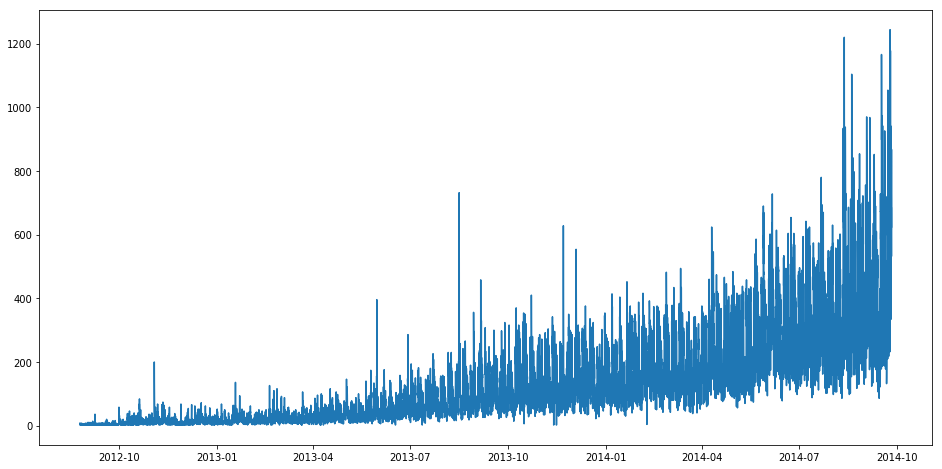

In [ ]:
plt.figure(figsize=(16,8)) 
plt.plot(count)

## Train val split

In [ ]:
train=df.loc['2012-08-25':'2014-06-24'] 
valid=df.loc['2014-06-25':'2014-09-25']

# Checking stationarity

### Using 'dicky fuller test'

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def test_stationarity(timeseries):
    
    # taking rolling statistics
    rolmean = timeseries.rolling(window =24).mean()  #24 hours on each day
    rolstd = timeseries.rolling(window =24).std() #24 hourse window
    
    plt.figure(figsize=(16,8)) 
    
    org = plt.plot(timeseries,color = 'blue',label = 'Original')
    mean = plt.plot(rolmean,color ='red',label = 'Rolling_mean')
    std = plt.plot(rolstd,color = 'black',label = 'Rolling_std')
    
    
    # Performing Dicky Fuller Test
    df_test = adfuller(timeseries,autolag='AIC')
    
    #print(df_test)
    '''
    print result
    (-4.456560536856816, 0.00023540466467666016, 45, 18242, {'1%': -3.430708525404171, '5%': -2.861698454786869, '10%': -2.5668543412994906}, 181026.8337109476)
    '''
    
    dfoutput = pd.Series(df_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

    for key,value in df_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


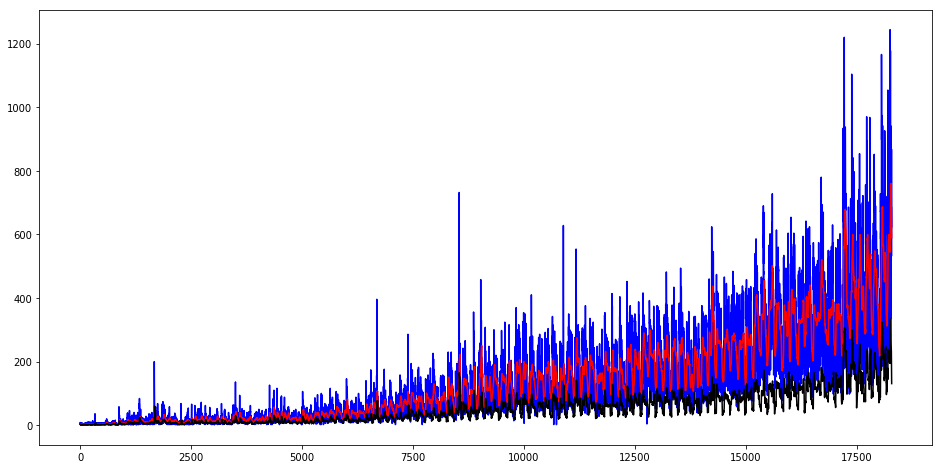

In [ ]:
test_stationarity(train_ori['Count'])

#### Interpret dicky fuller test

The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

---

## Making the TRAIN series 'Daily' average

In [ ]:
train = train['Count'].resample('D').mean()

In [ ]:
valid = valid['Count'].resample('D').mean()

---

## Removing trend

A trend exists when there is a long-term increase or decrease in the data. It does not have to be linear.

We see an increasing trend in the data so we can apply transformation which penalizes higher values more than smaller ones, for example log transformation.

We will take rolling average here to remove the trend. We will take the window size of 24 based on the fact that each day has 24 hours.

In [ ]:
df_log = np.log(train)
moving_avg = df_log.rolling(window=24).mean() # for 24 hours

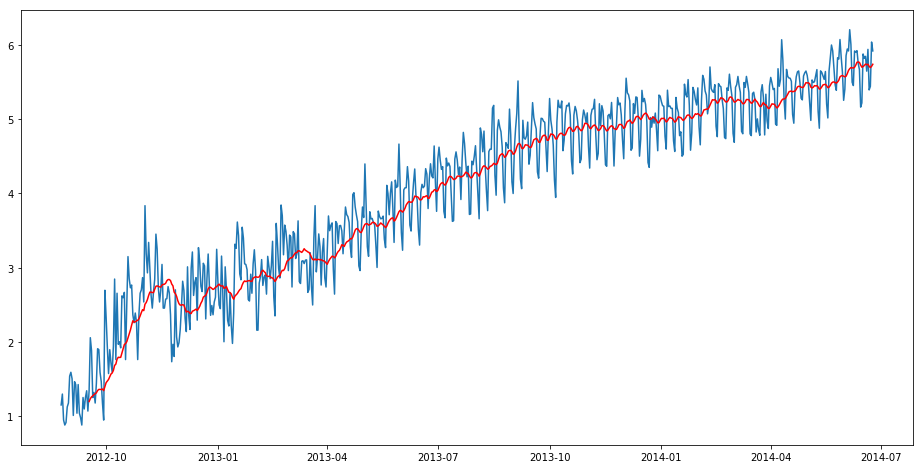

In [ ]:
# plotting log transformed series and moving average
plt.figure(figsize=(16,8)) 
plt.plot(df_log)
plt.plot(moving_avg,color = 'red')
plt.show()

### Removing increasing trend to make TS stationary

Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


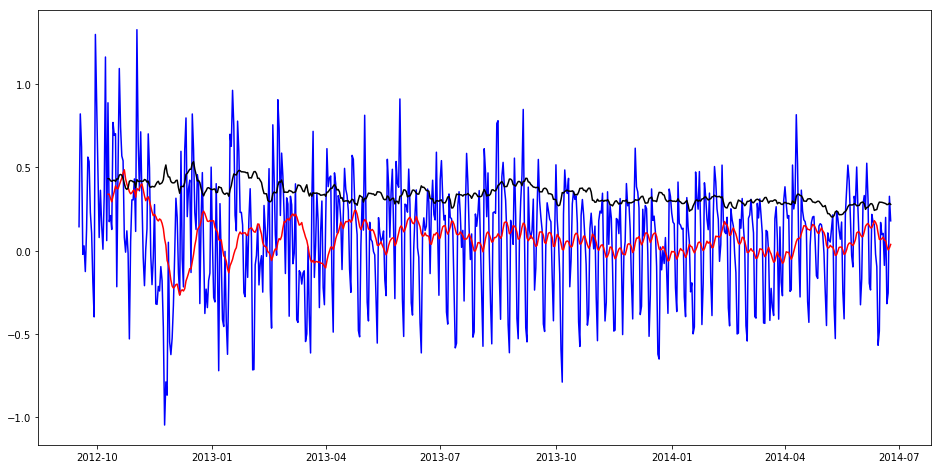

In [ ]:
train_log_moving_avg_diff = df_log - moving_avg

# testing stationarity after removing trend
train_log_moving_avg_diff.dropna(inplace = True)

test_stationarity(train_log_moving_avg_diff)

#### Stabilizing the mean of the time series which is also a requirement for a stationary time series.

* Differencing can help to make the series stable and eliminate the trend.

Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


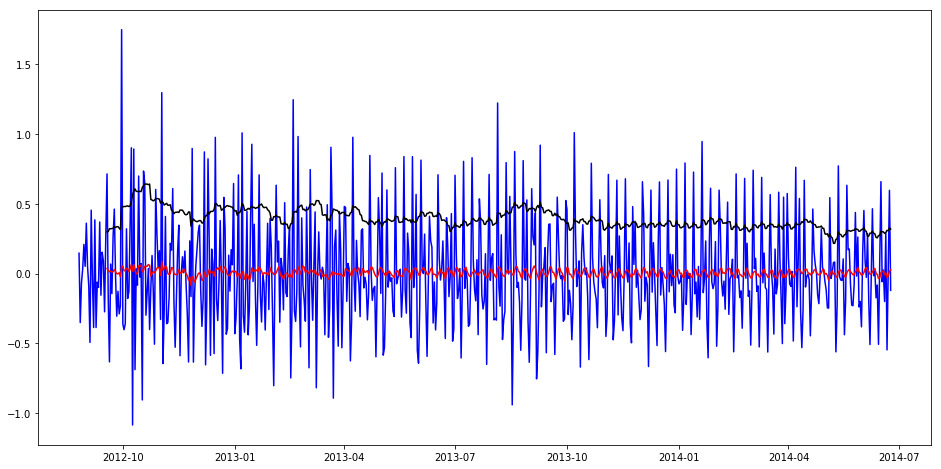

In [ ]:
train_log_diff = df_log - df_log.shift(1) 

test_stationarity(train_log_diff.dropna())

## Removing Seasonality

Use seasonal decompose to decompose the series into trend, seasonality and residuals.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df_log.values,freq=24)

In [ ]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

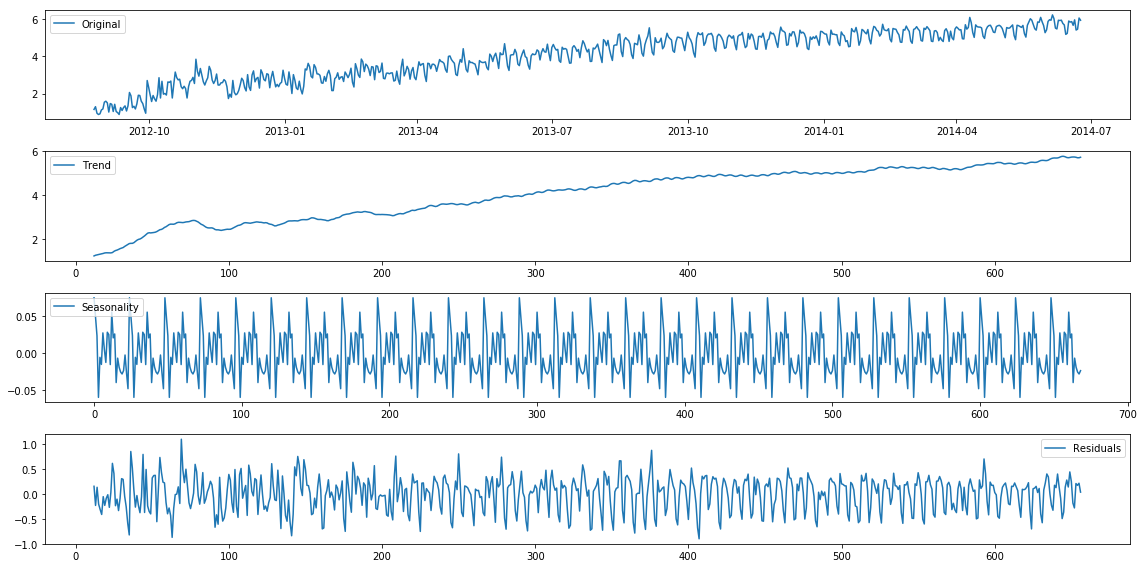

In [ ]:
# drawing comparison among different series

plt.figure(figsize=(16,8))

plt.subplot(411) 
plt.plot(df_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonality,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

#### checking stationarity of residuals

In [ ]:
type(residual)

numpy.ndarray

In [ ]:
residual.shape

(669,)

Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


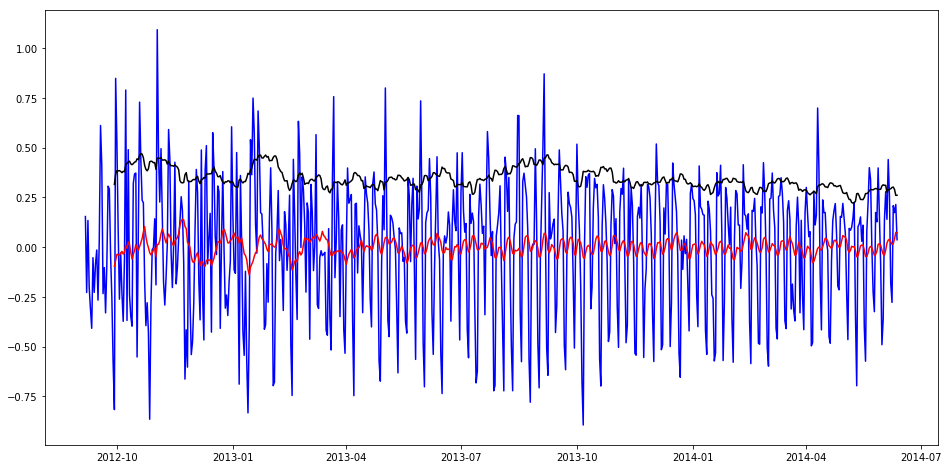

In [ ]:
df_log_residual = pd.DataFrame(residual)
df_log_residual.index = df_log.index

df_log_residual.dropna(inplace = True)

test_stationarity(df_log_residual[0])

---

## Forecasting the time series using ARIMA


### ACF and PACF plots

In [ ]:
from statsmodels.tsa.stattools import acf,pacf

lag_acf = acf(train_log_diff.dropna(),nlags=25)
lag_pacf = pacf(train_log_diff.dropna(),nlags=25,method='ols')

In [ ]:
lag_acf

array([ 1.        , -0.12750956, -0.37155599, -0.00201356,  0.04251157,
       -0.31216759,  0.0273935 ,  0.54233802, -0.02243329, -0.30160613,
        0.03607867, -0.00202239, -0.26736148,  0.01177982,  0.52703792,
       -0.00166577, -0.269499  , -0.02040818,  0.00952566, -0.21523476,
       -0.01993351,  0.4723452 ,  0.01277259, -0.23309947, -0.03202085,
        0.03060807])

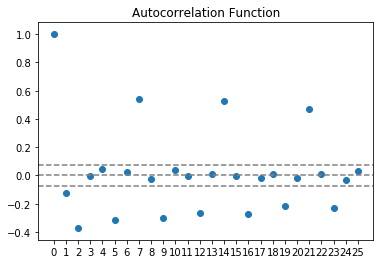

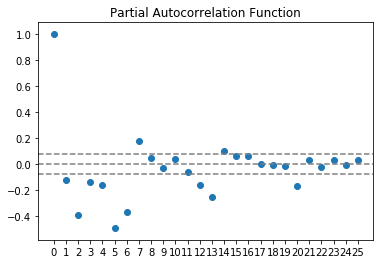

In [ ]:
# plotting the acf and pacf plots

plt.scatter(range(26),lag_acf) 
plt.xticks(range(26))
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 


plt.scatter(range(26),lag_pacf)
plt.xticks(range(26))
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Partial Autocorrelation Function') 
plt.show()

##### p,q value for ARIMA model

* p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.
* q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.



---

#### AR model

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

In [ ]:
model = ARIMA(df_log,order=(2,1,0)) # p = 1(AR parameter) d = 1(difference) and q = 1(MA parameter)

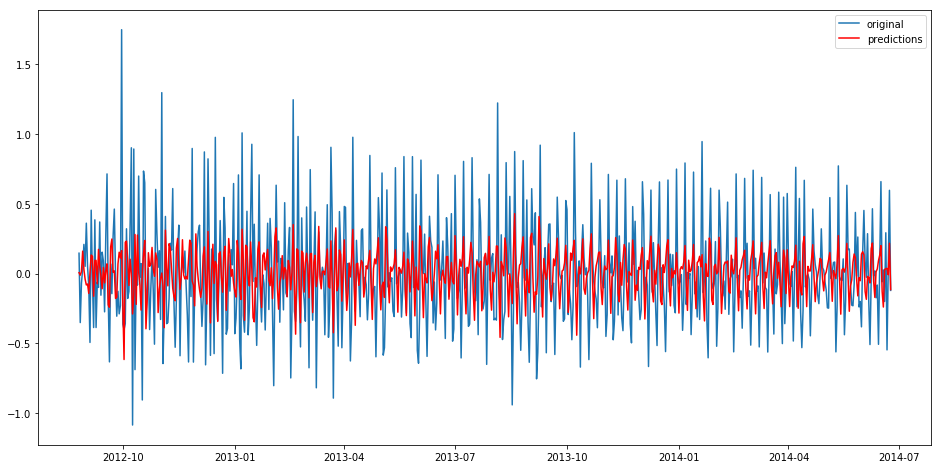

In [ ]:
# plotting the result

results_AR = model.fit(disp=-1) # disp is for showing the l_bfgs_b solver result (for -ve val no result shown)

plt.figure(figsize=(16,8))

plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()


Lets plot the validation curve for AR model.

We have to change the scale of the model to the original scale.

First step would be to store the predicted results as a separate series and observe it.

In [ ]:
ar_predict = results_AR.predict(start="2014-06-25", end="2014-09-25")

ar_predict = ar_predict.cumsum().shift().fillna(0) # cumulative sum to reverse rolling mean

ar_predict1 = pd.Series(np.ones(valid.shape[0])*np.log(valid)[0],index=valid.index)
ar_predict1 = ar_predict1.add(ar_predict,fill_value = 0)

ar_predict = np.exp(ar_predict1)



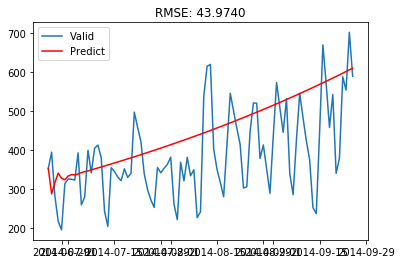

In [ ]:
plt.plot(valid, label = "Valid") 
plt.plot(ar_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(ar_predict, valid))/valid.shape[0])) 
plt.show()


### MA model

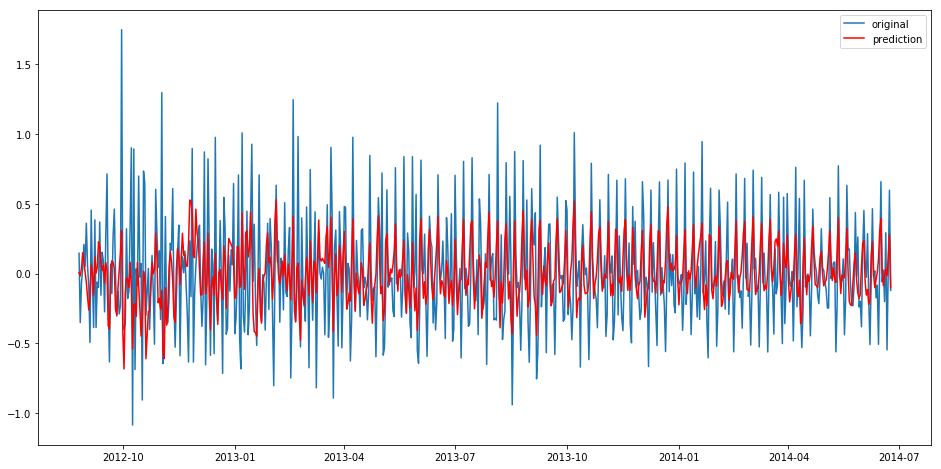

In [ ]:
model = ARIMA(df_log, order=(0, 1, 2))  # here the p value is zero since it is just the MA model 

results_ma = model.fit(disp=-1)  

plt.figure(figsize=(16,8))

plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_ma.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

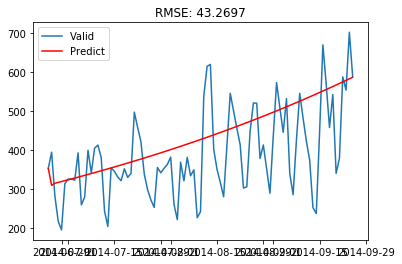

In [ ]:
# plotting the values

ma_predict=results_ma.predict(start="2014-06-25", end="2014-09-25") 
ma_predict=ma_predict.cumsum().shift().fillna(0) 
ma_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid)[0], index = valid.index) 

ma_predict1 = ma_predict1.add(ma_predict,fill_value=0) 
ma_predict = np.exp(ma_predict1)

plt.plot(valid, label = "Valid") 
plt.plot(ma_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(ma_predict, valid))/valid.shape[0])) 
plt.show()

### Combined model

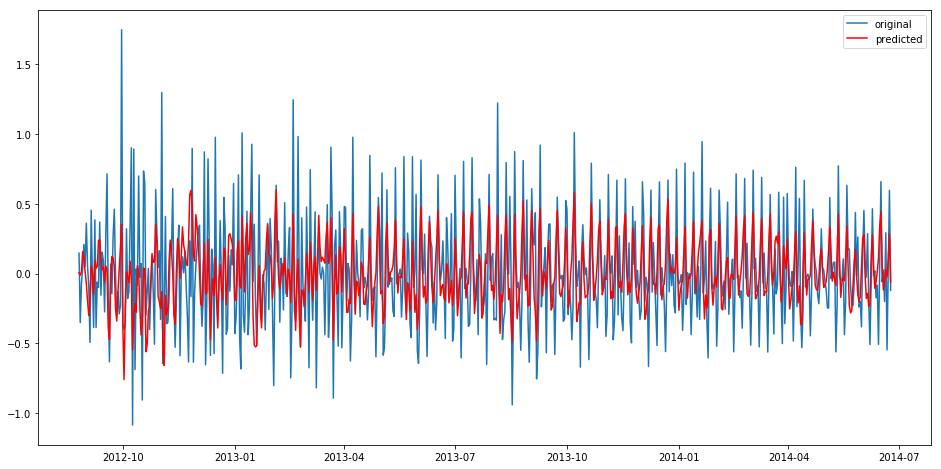

In [ ]:
model = ARIMA(df_log, order=(2, 1, 2))  

results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(16,8))

plt.plot(train_log_diff.dropna(),  label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

#### defining functions to change the scale of the model to the original scale

In [ ]:
def check_prediction_diff(predict_diff,given_set):
    
    predict_diff = predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set)[0],index = given_set.index)
    
    predict_log = predict_base.add(predict_diff,fill_value = 0)
    predict = np.exp(predict_log)
    
    plt.plot(given_set, label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set))/given_set.shape[0]))
    plt.show()

In [ ]:
def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set, label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set))/given_set.shape[0]))
    plt.show()

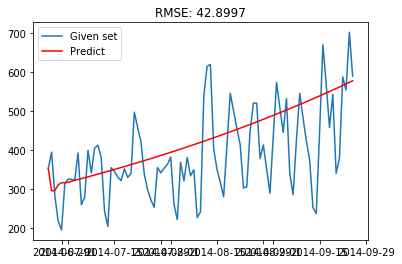

In [ ]:
ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")

check_prediction_diff(ARIMA_predict_diff, valid)

## SARIMAX model 

It takes into account the seasonality of the time series.

In [ ]:
import statsmodels.api as sm

* Order in the above model represents the order of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.


* Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.


* In our case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

In [ ]:
y_hat_avg = valid.copy() 

fit1 = sm.tsa.statespace.SARIMAX(train, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 

y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 

plt.figure(figsize=(16,8)) 

plt.plot( train, label='Train') 
plt.plot(valid, label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
rms = np.sqrt(mean_squared_error(valid, y_hat_avg.SARIMA)) 
print(rms)

In [ ]:
predict=fit1.predict(start="2014-9-26", end="2015-4-26", dynamic=True)

### Note that these are the daily predictions and we need hourly predictions. 

### So, we will distribute this daily prediction into hourly counts. 

### To do so, we will take the ratio of hourly distribution of passenger count from train data and then we will distribute the predictions in the same ratio.